In [0]:
#drive mount

from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Unzip the image folder
import zipfile

# You can change this based on your saved path location
zip_path = '/content/drive/My Drive/CNN_Image-Classifier/data.zip'

zf = zipfile.ZipFile(zip_path, mode='r')
zf.extractall()
zf.close()

In [0]:
#Load the img files
from sklearn.model_selection import train_test_split
import numpy as np
import os 
import cv2

IMG_SIZE_X = 100
IMG_SIZE_Y = 100
data_path = './cs3793data'
pathsAndCategories = []

for folder in os.listdir(data_path):
  if not '.DS' in folder:
    categoryPath = data_path + "/" + folder
      
    for imgPath in os.listdir(categoryPath):
      if imgPath.lower().endswith(('.jpg')) or imgPath.lower().endswith(('.png')) or imgPath.lower().endswith(('.jpeg')):
          picturePath = categoryPath + "/" + imgPath
          pathsAndCategories.append((picturePath, folder))

picturePaths = list()
categories = list()

for path, category in pathsAndCategories:
  picturePaths.append(path)
  categories.append(category)

x = list()
y = categories

for path in picturePaths:
  img = cv2.imread(path)
  img = cv2.resize(img, (IMG_SIZE_X, IMG_SIZE_Y))
  b,g,r = cv2.split( img )
  x.append(cv2.merge([r,g,b]))

In [0]:
#getting more info about pictures
rawImgs = []

for path in picturePaths:
  img = cv2.imread(path)
  rawImgs.append(img)



In [0]:
imgWidths = []
imgHeights = []

for img in rawImgs:
  imgWidths.append(img.shape[1])
  imgHeights.append(img.shape[0])

print("Max width and height: ", max(imgWidths), max(imgHeights))
print("Min width and height: ", min(imgWidths), min(imgHeights))

minW = min(imgWidths)
minH = min(imgHeights)

Max width and height:  3008 4256
Min width and height:  106 101


In [0]:
%tensorflow_version 1.x
from sklearn.preprocessing import LabelEncoder
import keras
import sys

le = LabelEncoder()
le.fit(y)
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
y_numerical = le.transform(y)

x_train, x_test, y_train, y_test = train_test_split(x, y_numerical, train_size = 0.75, test_size=0.25, random_state=42)

x_train = np.asarray(x_train)
x_test = np.asarray(x_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

input_shape = (IMG_SIZE_X, IMG_SIZE_Y, 3)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

num_classes = len(set(y_test))

y_train = keras.utils.to_categorical( y_train, num_classes )
y_test = keras.utils.to_categorical( y_test, num_classes )

print('categorical example: ', y_train[4])
print('and back again: ', le.inverse_transform(np.argmax(y_train, axis=-1))[4])

Using TensorFlow backend.


x_train shape: (4660, 100, 100, 3)
4660 train samples
1554 test samples
categorical example:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0.]
and back again:  tennis-ball


In [0]:
#Create and fit model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
import matplotlib.pylab as plt
import tensorflow as tf

model = Sequential()

#Convolutional layer 1
model.add(Conv2D(30, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

#Convolutional layer 2
model.add(Conv2D(60, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

#Convolutional layer 3
model.add(Conv2D(120, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

#Finish adding convolution layers so now flatten data
model.add(Flatten())
model.add(Dropout(0.5))

#Add layers
model.add(Dense(128, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Done with layers so compile model with categorical crossentropy because 1's and 0's
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

print(model.summary())

# model fit
history = model.fit(x_train, y_train,validation_data=(x_test,y_test),epochs=50,batch_size=10)

# Save the model
# model.save('models/test1.h5')

# Check if model did good
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 98, 98, 30)        840       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 49, 49, 30)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 49, 49, 30)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 47, 47, 60)        16260     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 60)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 23, 23, 60)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 21, 21, 120)      

Total Images:  6214
Total Unique Classes:  53


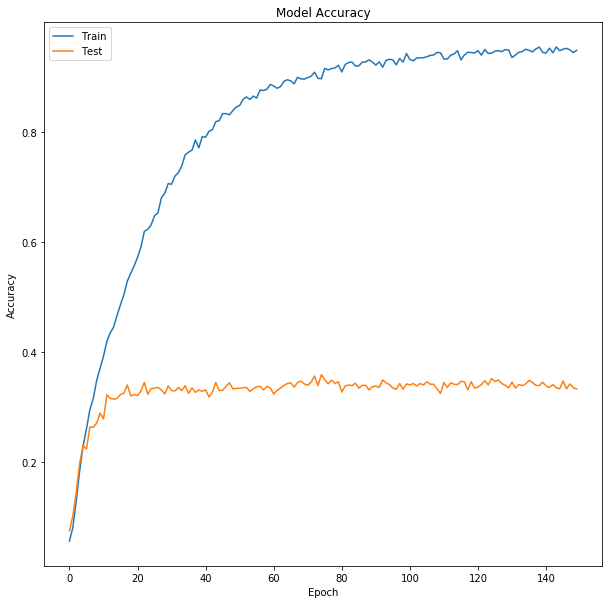

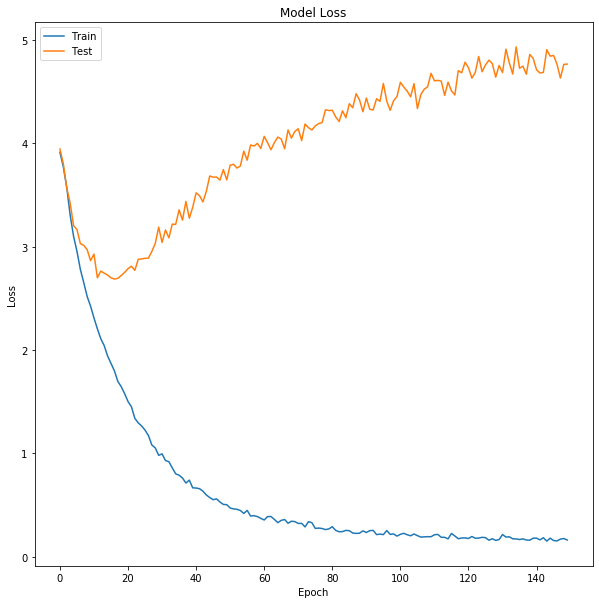

For:  ['unicorn'] It Predicted: ['airplane']
For:  ['horse'] It Predicted: ['horse']
For:  ['mailbox'] It Predicted: ['airplane']
For:  ['ladder'] It Predicted: ['gorilla']
For:  ['elk'] It Predicted: ['ostrich']
For:  ['elephant'] It Predicted: ['elephant']
For:  ['gorilla'] It Predicted: ['gorilla']
For:  ['swan'] It Predicted: ['light-house']
For:  ['xylophone'] It Predicted: ['xylophone']
For:  ['swan'] It Predicted: ['light-house']
For:  ['hummingbird'] It Predicted: ['airplane']
For:  ['ladder'] It Predicted: ['airplane']
For:  ['goat'] It Predicted: ['camel']
For:  ['snowmobile'] It Predicted: ['airplane']
For:  ['golf-ball'] It Predicted: ['airplane']
For:  ['teddy-bear'] It Predicted: ['goat']
For:  ['kangaroo'] It Predicted: ['elephant']
For:  ['frog'] It Predicted: ['piano']
For:  ['airplane'] It Predicted: ['airplane']
For:  ['llama'] It Predicted: ['airplane']
For:  ['teapot'] It Predicted: ['airplane']
For:  ['snowmobile'] It Predicted: ['dolphin']
For:  ['teddy-bear'] It

<Figure size 720x720 with 0 Axes>

In [0]:
#Evaluate and visualize model
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10,10)

# to get total number of images
print("Total Images: ", x_train.shape[0] + x_test.shape[0])
# to get number of unique classes
classesU = np.unique(le.inverse_transform(np.argmax(y_train, axis=-1)))
print("Total Unique Classes: ", len(classesU))

# to get number of images per class

def imagesPerClass():
  train = le.inverse_transform(np.argmax(y_train, axis=-1))
  test = le.inverse_transform(np.argmax(y_test, axis=-1))

  classTrain = []
  classTest = []
  train_counts = []
  test_counts = []

  for word in classesU: 
    train_counter = np.count_nonzero(train == word)
    classTrain.append(word + "\n" + str(train_counter))
    train_counts.append(train_counter)


    test_counter = np.count_nonzero(test == word)
    classTest.append(word + "\n" + str(test_counter))
    test_counts.append(test_counter)
    # print(word,"|",train_counter, "|", test_counter)
  
  # Training Graph
  space = np.arange(len(classTrain))
  plt.ylabel('Images Per Class')
  plt.xticks(space, classTrain)
  plt.title("Training Bar Graph")
  height = [i for i, _ in enumerate(classTrain)]
  graph = plt.bar(height,train_counts)
  plt.show()

  # Testing Graph
  space = np.arange(len(classTest))
  plt.ylabel('Images Per Class')
  plt.xticks(space, classTest)
  plt.title("Testing Bar Graph")
  height = [i for i, _ in enumerate(classTest)]
  graph = plt.bar(height,test_counts)
  plt.show()

def accLossVis():
  # Accuracy and Loss Visualization
  checkAccuracy = history.history['acc']
  checkValAcc = history.history['val_acc']

  plt.plot(checkAccuracy)
  plt.plot(checkValAcc)
  plt.title("Model Accuracy")
  plt.ylabel("Accuracy")
  plt.xlabel("Epoch")
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

  checkLoss = history.history['loss']
  checkValLoss = history.history['val_loss']

  plt.plot(checkLoss)
  plt.plot(checkValLoss)
  plt.title("Model Loss")
  plt.ylabel("Loss")
  plt.xlabel("Epoch")
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

def predVis():
  i = 0
  plt.figure(figsize=(10,10))

  # Actual Predictions
  predictions = model.predict(x_test)

  # To make sure all predictions are rounded
  for a,b in enumerate(predictions):
    newArray = np.where(predictions > 0.5, 1., 0.)

  correct = 0
  incorrect = 0
  # Check predictions
  for p,v in zip(newArray,y_test):
    equality = np.array_equal(p,v)
    temp1 = []
    temp2 = []
    maxI1 = np.argmax(p, axis=-1)
    temp1.append(maxI1)
    maxI2 = np.argmax(v, axis=-1)
    temp2.append(maxI2)
    word1 = le.inverse_transform(temp1)
    word2 = le.inverse_transform(temp2)
    # print("For: ", word2, "It Predicted:", word1)
    # Display images here if able too
    cv2_imshow(x_test[0])

    i += 1
    if(equality == True):
      # if(p == v).all():
      correct += 1
    if(equality == False):
      incorrect += 1

  print("Total Incorrect = ", incorrect, "Total Correct = ", correct, "Total = ", (correct + incorrect))

#imagesPerClass()
accLossVis()
predVis()